<a href="https://colab.research.google.com/github/dariashcherbakovaaa/pet-projects/blob/main/Credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! kaggle datasets download -d kapturovalexander/bank-credit-scoring
!unzip /content/bank-credit-scoring.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring
License(s): Attribution 4.0 International (CC BY 4.0)
100% 182k/182k [00:00<00:00, 724kB/s]
100% 182k/182k [00:00<00:00, 723kB/s]
Archive:  /content/bank-credit-scoring.zip
  inflating: dataset/bank.csv        
  inflating: dataset/scoring.jpg     


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

RAND = 42

In [3]:
df = pd.read_csv('/content/dataset/bank.csv', sep=';', na_values='unknown').drop_duplicates()
print(df.shape)
df.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,59,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4483 non-null   object
 2   marital    4521 non-null   object
 3   education  4334 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    3197 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   816 non-null    object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
for col in df.columns:
  missing_percentage = df[col].isna().sum() / df.shape[0]*100
  if missing_percentage != 0:
    print(f'The % of missing value in {col} is {missing_percentage:.0f}%')

The % of missing value in job is 1%
The % of missing value in education is 4%
The % of missing value in contact is 29%
The % of missing value in poutcome is 82%


In [6]:
mode_job = df.job.mode()[0]
df.job = df.job.fillna(mode_job)

mode_edu = df.education.mode()[0]
df.education = df.education.fillna(mode_edu)

df.drop(columns='contact', inplace = True)

df.poutcome = df.poutcome.fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df['default'].equals(df['y'])

False

In [9]:
df.nunique()

,0
age,67
job,11
marital,3
education,3
default,2
balance,2353
housing,2
loan,2
day,31
month,12


In [10]:
df.describe(include=object)

,job,marital,education,default,housing,loan,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,11,3,3,2,2,2,12,4,2
top,management,married,secondary,no,yes,no,may,unknown,no
freq,1007,2797,2493,4445,2559,3830,1398,3705,4000


     y  percentage
0   no   88.476001
1  yes   11.523999


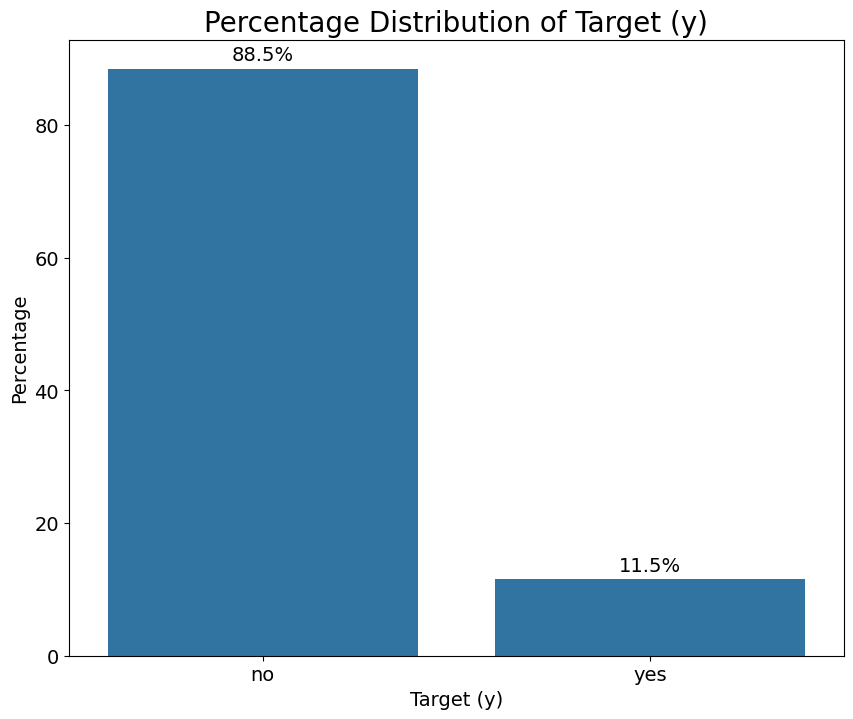

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

norm_y = (
    df['y']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'percent': 'category', 'proportion': 'percentage'})
)

print(norm_y)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='y', y='percentage', data = norm_y)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=14
    )

plt.title('Percentage Distribution of Target (y)', fontsize=20)
plt.xlabel('Target (y)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


  default  percentage
0      no   98.318956
1     yes    1.681044


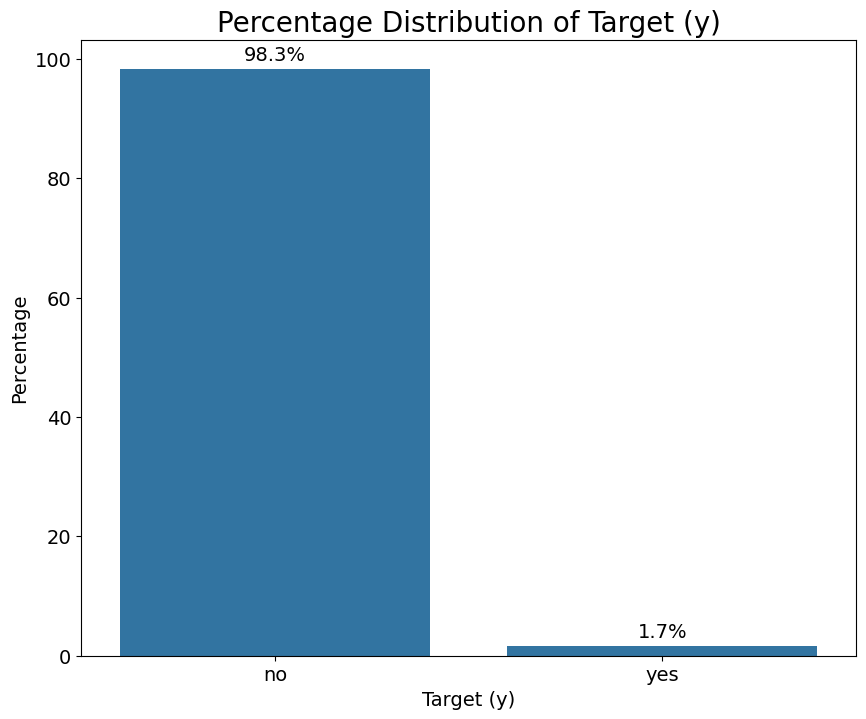

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

norm_y = (
    df['default']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'percent': 'category', 'proportion': 'percentage'})
)

print(norm_y)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='default', y='percentage', data = norm_y)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=14
    )

plt.title('Percentage Distribution of Target (y)', fontsize=20)
plt.xlabel('Target (y)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [18]:
df.y.unique()

array(['no', 'yes'], dtype=object)

Text(2.0364444444444434, 0.5, 'Density')

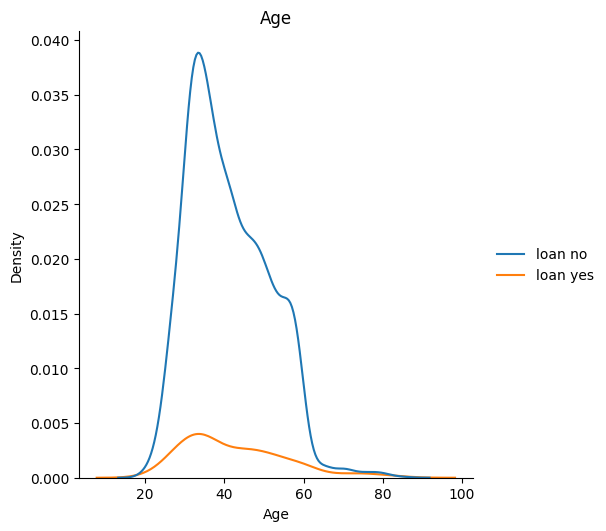

In [19]:
# age

sns.displot(
    {
      'loan no': df[df.y == 'no'].age,
      'loan yes': df[df.y == 'yes'].age,
    },
    kind = 'kde'
)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Density')

In [20]:
df.groupby('y')['age'].median()

,age
y,
no,39.0
yes,40.0


In [21]:
df.groupby('y')['age'].mean()

,age
y,
no,40.998000
yes,42.491363


In [22]:
df.groupby('y')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,y,age
0,no,34
1,yes,32


In [26]:
df.education.unique()

array(['primary', 'secondary', 'tertiary'], dtype=object)

Text(10.224513888888888, 0.5, 'Density')

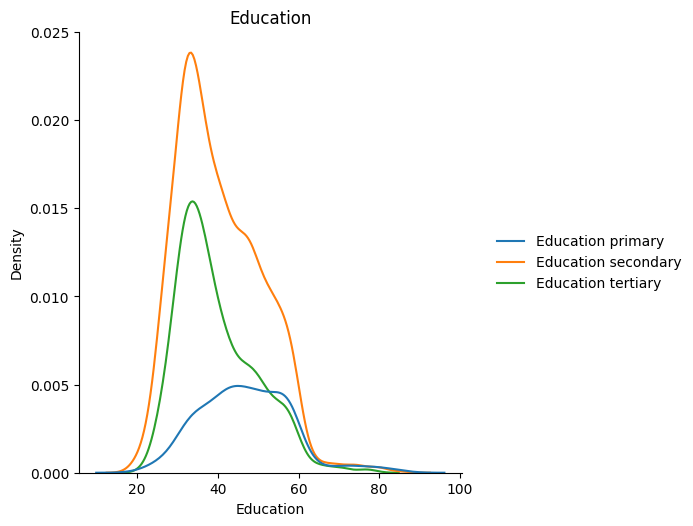

In [27]:
# education

sns.displot(
    {
      'Education primary': df[df.education == 'primary'].age,
      'Education secondary': df[df.education == 'secondary'].age,
      'Education tertiary': df[df.education == 'tertiary'].age,
    },
    kind = 'kde'
)

plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Density')

Text(0, 0.5, 'Age')

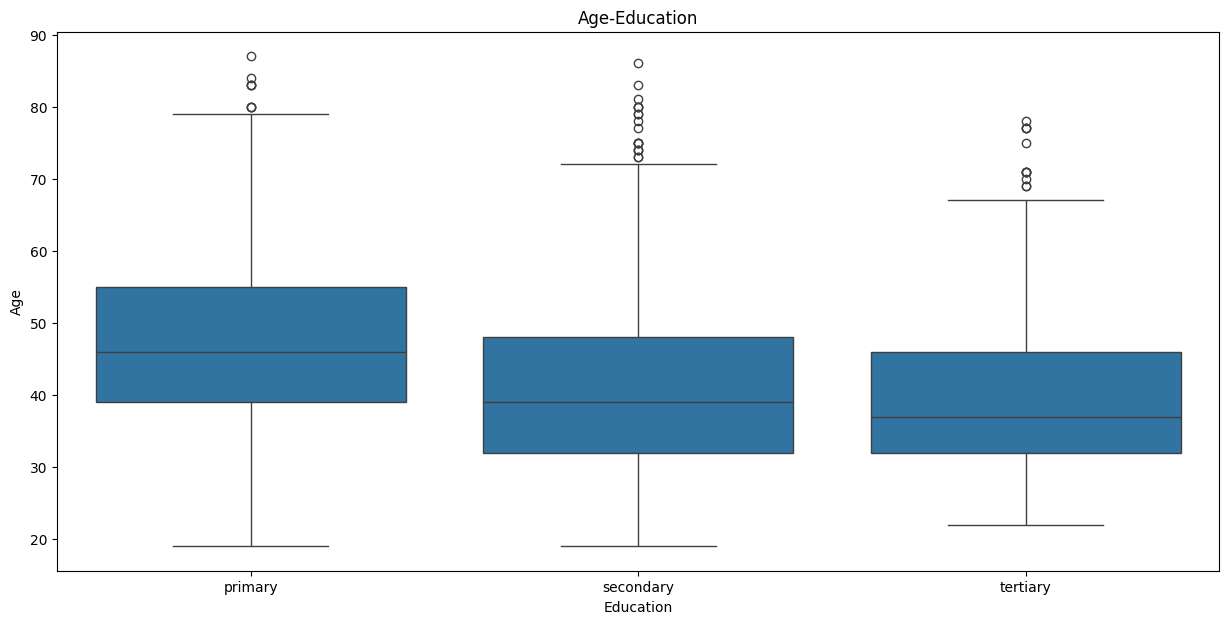

In [28]:
plt.figure(figsize=(15,7))

sns.boxplot(x = 'education', y = 'age', data = df)

plt.title('Age-Education')
plt.xlabel('Education')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

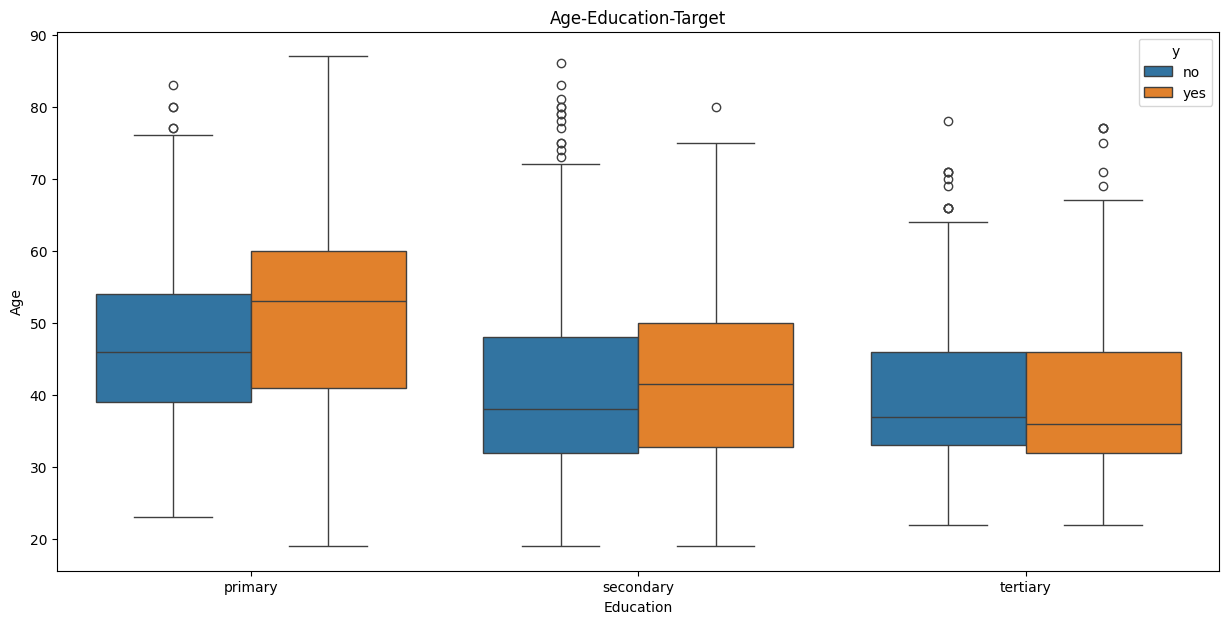

In [29]:
plt.figure(figsize=(15,7))

sns.boxplot(x = 'education', y = 'age', hue = 'y', data = df)

plt.title('Age-Education-Target')
plt.xlabel('Education')
plt.ylabel('Age')

     y  education  proportion
2   no    primary   15.350000
5  yes    primary   12.284069
0   no  secondary   55.725000
3  yes  secondary   50.671785
1   no   tertiary   28.925000
4  yes   tertiary   37.044146


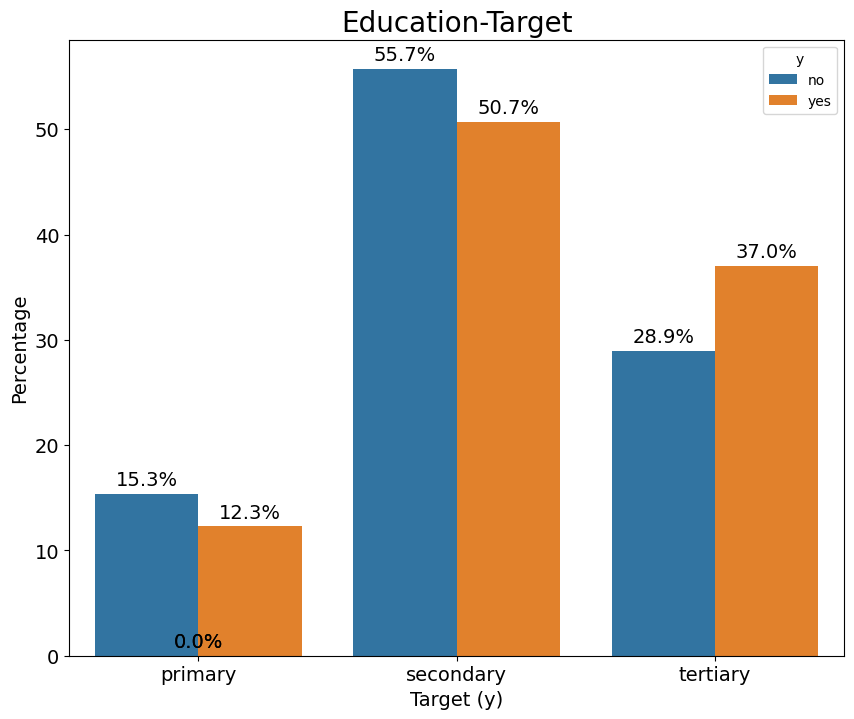

In [34]:
educ_y = (
    df.groupby(['y'])['education']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .sort_values('education')
)

print(educ_y)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='education', y='proportion', hue = 'y', data = educ_y)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=14
    )

plt.title('Education-Target', fontsize=20)
plt.xlabel('Target (y)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


<Axes: >

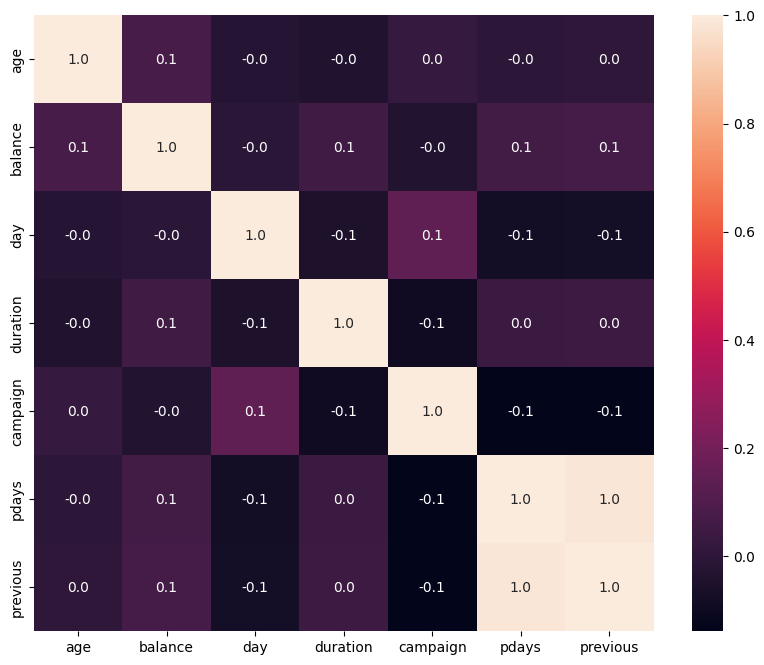

In [35]:
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_columns].corr(method = 'spearman'), annot=True, fmt='.1f')

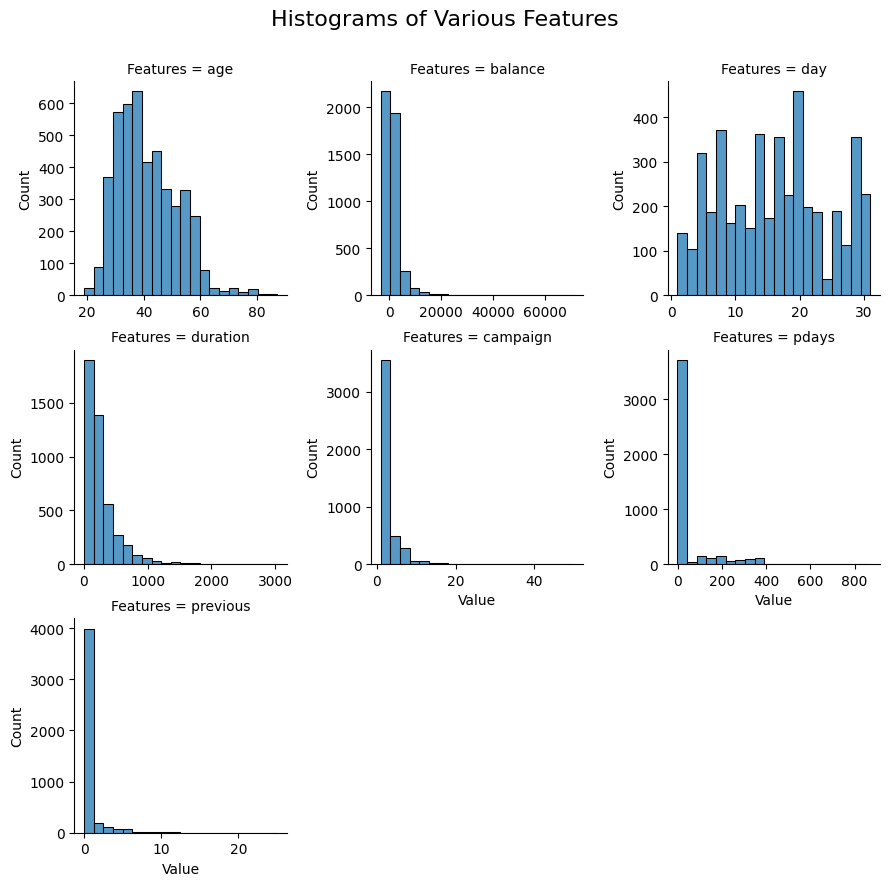

In [41]:
numerical_feautures = df[numerical_columns].stack().reset_index().rename(
    columns={'level_1': 'Features', 0: 'Value'}
)

g = sns.FacetGrid(data=numerical_feautures, col='Features',
                  col_wrap=3, sharex=False, sharey=False)

g = g.map(sns.histplot, 'Value', kde=False, bins=20)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Histograms of Various Features', fontsize=16)

plt.show()